Jack Powers / Neutron Probability Density Simulation

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.optimize import curve_fit as cf
import scipy.stats as sp

In [9]:
def walk(x, y, location, previous, i):
  nums = [0, 1, 2, 3] # vector of directions
  if (location == 'inside'):      # checks to see if it is in reactor or not
    if (previous == 'back'):
      num = random.choices(nums, weights=(25, 0, 25, 25), k=1) # randomly selects direction based off of previous direction
      if num[0] == 0:
        x[i] = x[i-1] -1 #updates direction vector with new position
        y[i] = y[i-1]
        previous = 'back' #updates previous
      elif num[0] == 2:
        y[i] = y[i-1] - 1
        x[i] = x[i-1]
        previous = 'down'
      else:
        y[i] = y[i-1] + 1
        x[i] = x[i-1]
        previous = 'up'
    elif (previous == 'forward'):
      num = random.choices(nums, weights=(0, 50, 25, 25), k=1)
      if num[0] == 1:
        x[i] = x[i-1] + 1
        y[i] = y[i-1]
        previous = 'forward'
      elif num[0] == 2:
        y[i] = y[i-1] - 1
        x[i] = x[i-1]
        previous = 'down'
      else:
        y[i] = y[i-1] + 1
        x[i] = x[i-1]
        previous = 'up'
    elif (previous == 'up'):
      num = random.choices(nums, weights=(25, 50, 0, 25), k=1)
      if num[0] == 0:
        x[i] = x[i-1] - 1
        y[i] = y[i-1]
        previous = 'back'
      elif num[0] == 1:
        x[i] = x[i-1] + 1
        y[i] = y[i-1]
        previous = 'forward'
      else:
        y[i] = y[i-1] + 1
        x[i] = x[i-1]
        previous = 'up'
    elif (previous == 'down'):
      num = random.choices(nums, weights=(25, 50, 25, 0), k=1)
      if num[0] == 0:
        x[i] = x[i-1] - 1
        y[i] = y[i-1]
        previous = 'back'
      elif num[0] == 1:
        x[i] = x[i-1] + 1
        y[i] = y[i-1]
        previous = 'forward'
      else:
        y[i] = y[i-1] - 1
        x[i] = x[i-1]
        previous = 'down'
      
  else:
    if (previous == 'back'):
      num = random.choices(nums, weights=(25, 0, 25, 25), k=1)
      if num[0] == 0:
        x[i] = x[i-1] - 1
        y[i] = y[i-1]
        previous = 'back'
      elif num[0] == 2:
        y[i] = y[i-1] - 1
        x[i] = x[i-1]
        previous = 'down'
      else:
        y[i] = y[i-1] + 1
        x[i] = x[i-1]
        previous = 'up'
    elif (previous == 'forward'):
      num = random.choices(nums, weights=(0, 25, 25, 25), k=1)
      if num[0] == 1:
        x[i] = x[i-1] + 1
        y[i] = y[i-1]
        previous = 'forward'
      elif num[0] == 2:
        y[i] = y[i-1] - 1
        x[i] = x[i-1]
        previous = 'down'
      else:
        y[i] = y[i-1] + 1
        x[i] = x[i-1]
        previous = 'up'
    elif (previous == 'up'):
      num = random.choices(nums, weights=(25, 25, 0, 25), k=1)
      if num[0] == 0:
        x[i] = x[i-1] - 1
        y[i] = y[i-1]
        previous = 'back'
      elif num[0] == 1:
        x[i] = x[i-1] + 1
        y[i] = y[i-1]
        previous = 'forward'
      else:
        y[i] = y[i-1] + 1
        x[i] = x[i-1]
        previous = 'up'
    elif (previous == 'down'):
      num = random.choices(nums, weights=(25, 25, 25, 0), k=1)
      if num[0] == 0:
        x[i] = x[i-1] - 1
        y[i] = y[i-1]
        previous = 'back'
      elif num[0] == 1:
        x[i] = x[i-1] + 1
        y[i] = y[i-1]
        previous = 'forward'
      else:
        y[i] = y[i-1] - 1
        x[i] = x[i-1]
        previous = 'down'
  global prev
  prev=previous


In [10]:
shieldEnds = np.arange(1, 100, 1) #creates vector of one hundred different shield ends to create variable shield widths
meanix = []
meanox = []
w= []
in_overnt = []
on_overnt = []
rn_overnt = []

for shieldEnder in shieldEnds: #loops through shield ends
  energyUnits = 100

  shieldEnd = shieldEnder
  shieldBegin = 0

  neutrons = np.zeros((5000, 2),dtype=np.ndarray)

  for n in range(0, len(neutrons)-1): #perfroms walk for 5000 neutrons
    x = np.zeros(energyUnits)
    y = np.zeros(energyUnits)
    previous = ''
    location = ''


    x[0] = shieldBegin + 1 ## intially setting velocity to be in the positive x -> the direction of the shield
    location = ''
    previous = 'forward'

    for i in range(1, energyUnits):
      if ((x[i-1] > shieldBegin) and (x[i-1] < shieldEnd)):
        location = 'inside'
      else:
        location = 'outside'
      walk(x, y, location, previous, i)
      previous=prev
    
    neutrons[n, 0] = x
    neutrons[n, 1] = y

    x_i = 0
    x_o = 0

    n_x_i = 0
    n_x_o = 0
    n_x_r = 0

  for i in range(0, len(neutrons)-1): #finds average distance paticel hs traveld depending on the region and the number of particles in that region
    if ((neutrons[i,0][energyUnits-1] > shieldBegin) and (neutrons[i,0][energyUnits-1] < shieldEnd)):
      x_i = x_i + neutrons[i,0][energyUnits-1]
      n_x_i += 1
    elif(neutrons[i,0][energyUnits-1] > shieldEnd):
      x_o = x_o + neutrons[i,0][energyUnits-1]
      n_x_o += 1
    else:
      n_x_r += 1
    
  

  if (n_x_i == 0): # finds the average number of particels in a region
    x_i_mean = 0
  else:
    x_i_mean = x_i/n_x_i

  if (n_x_o == 0):
    x_o_mean = 0
  else:
    x_o_mean = x_o/n_x_o

  

  #updates the average number of particles in the region as a function of shield width
  in_overnt.append(n_x_i/5000)
  on_overnt.append(n_x_o/5000)
  rn_overnt.append(n_x_r/5000)
  meanix.append(x_i_mean)
  meanox.append(x_o_mean)
  w.append(shieldEnd-shieldBegin)

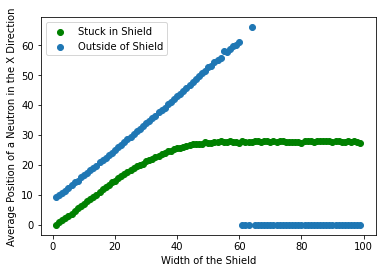

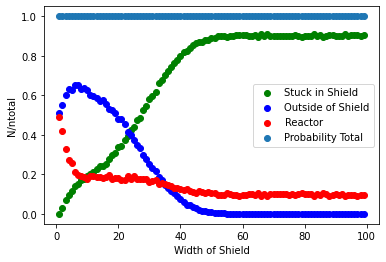

In [11]:
#plots Average X vs Width and 

fig = plt.figure(0)
plt.scatter(w, meanix, label='Stuck in Shield', color = 'g')
plt.scatter(w, meanox, label = 'Outside of Shield')
plt.legend()
plt.ylabel('Average Position of a Neutron in the X Direction')
plt.xlabel('Width of the Shield')
#plt.yscale("log")
plt.show()

z1 = np.array(rn_overnt)+np.array(on_overnt)+np.array(in_overnt)
fig1 = plt.figure(1)
plt.scatter(w, in_overnt, label='Stuck in Shield', color = 'g')
plt.scatter(w, on_overnt, label = 'Outside of Shield', color = 'b')
plt.scatter(w, rn_overnt, label = 'Reactor', color = 'r')
plt.scatter(w,z1, label ='Probability Total')
plt.legend()
plt.ylabel('N/ntotal')
plt.xlabel('Width of Shield')
#plt.yscale("log")
plt.show()


In [12]:
#guess pdf 

from scipy.optimize import curve_fit as cf
import scipy.special as ss

def func1(x, b, a, C):
  return a*np.exp(-b*x) + C
 

[0.23388153 0.5        0.11994171]
[ 0.03565864 -1.12443134  0.99201634]


Text(0.5, 0, 'Width of Shield')

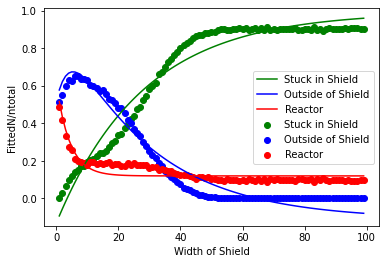

In [56]:
## completes fitting in order to find probability distribution functions

optc1, optv1 = cf(func1, np.array(w), np.array(rn_overnt), bounds= ([0,0.5, 0],[1,1,1]), check_finite=False, maxfev=10000)
optc2, optv2 = cf(func1, np.array(w), np.array(in_overnt), bounds= ([0,-2, 0],[0.5,10,1]), check_finite=False, maxfev=10000)

print(optc1)
print(optc2)

fig3 = plt.figure(3)
plt.scatter(w, in_overnt, label='Stuck in Shield', color = 'g')
plt.scatter(w, on_overnt, label = 'Outside of Shield', color = 'b')
plt.scatter(w, rn_overnt, label = 'Reactor', color = 'r')
plt.plot(np.array(w), func1(np.array(w), *optc2), color ='g', label= 'Stuck in Shield Fit')
plt.plot(w, (1-func1(np.array(w), *optc2)-func1(np.array(w), *optc1)), color='b', label='Outside of Shield Fit')
plt.plot(np.array(w), func1(np.array(w), *optc1), color = 'r', label='Reactor Fit')
plt.legend()
plt.ylabel('FittedN/ntotal')
plt.xlabel('Width of Shield')

